In [24]:
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import time

In [2]:
mu, sigma = 0, 10
s = np.random.normal(mu, sigma, 150)

In [3]:
#Constructing the design matrix of all of the data, stored in X
X = np.ones((150, 3))
for i in range(150):
    for j in range(1, 3):
        X[i, j] = s[i]**j

In [4]:
#Sampling 3 values for {θ0, θ1, θ2}
#The while loop makes sure that they are all bewteen 0 and 1
theta = np.random.normal(0, 1, 3)
test = False
while not test:
    if np.amin(theta) < 0 or np.amax(theta) > 1:
        theta = np.random.normal(0, 1, 3)
    else:
        test = True

In [5]:
#Generating y values
y = X.dot(theta)
#Adding random noise
noise = np.random.normal(0, 8, len(y))
y = y + noise
#Values for Y now stored in an array y, with random noise added

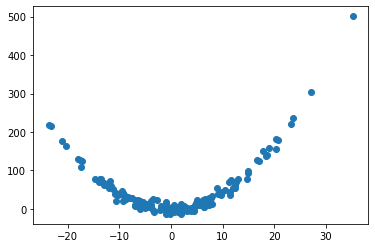

In [6]:
plot.scatter(s, y)
plot.show()

In [7]:
#We now need to split the data into training, validation and testing data
#There are 150 vals of x, and 150 vals of y
#90 for training, 30 for validation and testing

v = np.arange(0, 150)
train = np.random.choice(v, 90, replace=False)
v_2 = np.delete(v, train)
val = np.random.choice(v_2, 30, replace=False)
temp = np.append(train, val)
test = np.delete(v, temp)

#Now the indexes of each set are stored in their corresponding arrays
#We need to set up x_train, x_val and x_test

x_train = np.take(s, train)
x_val = np.take(s, val)
x_test = np.take(s, test)

#now create X_train, X_val, X_test, as well as the corresponding y arrays

X_train = np.ones((90, 3))
X_val = np.ones((30, 3))
X_test = np.ones((30, 3))

for i in range(90):
    for j in range(1,3):
        X_train[i, j] = x_train[i]**j
for i in range(30):
    for j in range(3):
        X_val[i, j] = x_val[i]**j
        X_test[i, j] = x_train[i]**j
#Getting corresponding y values 
y_train = X_train.dot(theta)
y_val = X_val.dot(theta)
y_test = X_test.dot(theta)

noise_train = np.random.normal(0, 8, len(y_train))
y_train = y_train+noise_train
noise_val = np.random.normal(0, 8, len(y_val))
y_val = y_val + noise_val
noise_test = np.random.normal(0, 8, len(y_test))
y_test = y_test + noise_test

In [9]:
#we now have our data stored in s and y
start = time.time()
closedForm_train = np.linalg.inv((X_train.transpose().dot(X_train)))\
.dot(X_train.transpose()).dot(y_train)
end = time.time()
print("The true solution for theta: ", end="")
print(theta)
print("The calculated closed form solution: ", end="")
print(closedForm_train)
print(f"Runtime of the program is {end - start}")

The true solution for theta: [0.16857291 0.13494105 0.40560083]
The calculated closed form solution: [1.95411159 0.2699616  0.398133  ]
Runtime of the program is 0.0010008811950683594


In [52]:
#Calculating training and validation error for cell above
y_calc = closedForm_train[0] + closedForm_train[1]*X_train[:,1] + closedForm_train[2]*X_train[:,2]
error = 0.5*sum(np.power(y_train - y_calc, 2))
print(error)
y_calc = closedForm_train[0] + closedForm_train[1]*X_val[:,1] + closedForm_train[2]*X_val[:,2]
error = 0.5*sum(np.power(y_val - y_calc, 2))
print(error)
y_calc = closedForm_train[0] + closedForm_train[1]*X_test[:,1] + closedForm_train[2]*X_test[:,2]
error = 0.5*sum(np.power(y_test - y_calc, 2))
print(error)

2211.2663815284677
786.2434598124518
922.9613759594413


In [296]:
relError = abs((closedForm_train - theta)/theta)*100
print(relError)

[303.25089577  19.09316251   0.48439539]


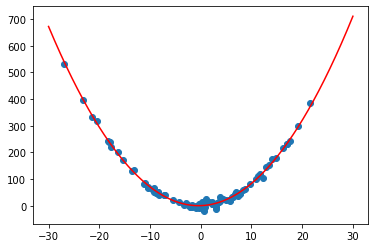

In [297]:
#Plotting actual graph versus trained graph using closed form
xt = np.linspace(-30, 30, 1000)
yt = theta[0] + theta[1]*np.power(xt, 1) + theta[2]*np.power(xt, 2)
yt2 = closedForm_train[0] + closedForm_train[1]*np.power(xt, 1) + closedForm_train[2]*np.power(xt, 2)
plot.plot(xt, yt, 'r')
plot.scatter(x_train, y_train)
plot.show()

In [ ]:
#We need to calculate the training/validation error

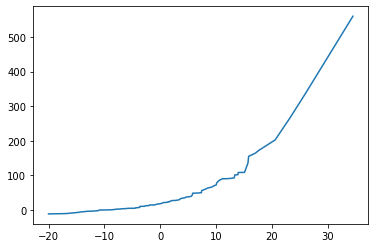

In [19]:
#Sorting broken

plot.plot(np.sort(x_train), np.sort(y_train))
plot.show()

In [187]:
print(X_train.shape)

(90, 3)


Runtime of the program is 0.0020029544830322266


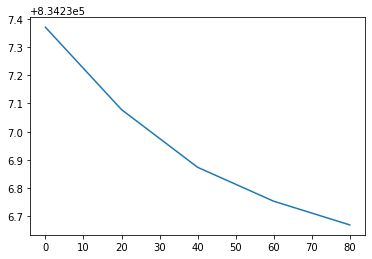

In [50]:
#Repeating finding our solutions, this time using gradient desecnt

alpha = 10**-13
theta_train = np.array([1, 1, 1])
thetaOld = np.array([10, 10, 10])
err = np.array([])
timeA = 0;
timeArr = np.array([])
ep = 10**-8
startT = time.time()
while np.linalg.norm(theta_train - thetaOld) > ep:
    for count, row in enumerate(X_train):
        thetaOld = theta_train
        theta_train = theta_train - alpha*(theta_train.dot(row[0:3]) - y_train[count])*row[0:3]
        if timeA%20 == 0:
            y_calc = theta_train[0] + theta_train[1]*X_train[:,1] + theta_train[2]*X_train[:,2]
            error = 0.5*sum(np.power(y_train - y_calc, 2))
            err = np.append(err, error)
            timeArr = np.append(timeArr, timeA)
        timeA = timeA+1
endT = time.time()
print(f"Runtime of the program is {endT - startT}")
plot.plot(timeArr, err)
plot.show()

In [51]:
#Calculating training and validation error for cell above
print(err[-1])
y_calc = theta_train[0] + theta_train[1]*X_val[:,1] + theta_train[2]*X_val[:,2]
error = 0.5*sum(np.power(y_val - y_calc, 2))
print(error)
y_calc = theta_train[0] + theta_train[1]*X_test[:,1] + theta_train[2]*X_test[:,2]
error = 0.5*sum(np.power(y_test - y_calc, 2))
print(error)

834236.6696896172
83940.26664978248
397849.58144298306


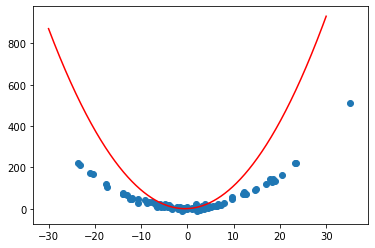

In [42]:
xt = np.linspace(-30, 30, 1000)
yt = theta_train[0] + theta_train[1]*np.power(xt, 1) + theta_train[2]*np.power(xt, 2)
plot.plot(xt, yt, 'r')
plot.scatter(x_train, y_train)
plot.show()

In [20]:
#Appending x^3
x3 = x_train**3
x3 = x3.reshape(90, 1)
X_train = np.append(X_train, x3, axis=1)
x3 = x_val**3
x3 = x3.reshape(30, 1)
X_val = np.append(X_val, x3, axis = 1)
x3 = x_test**3
x3 = x3.reshape(30, 1)
X_test = np.append(X_test, x3, axis = 1)

Runtime of the program is 1.2376813888549805


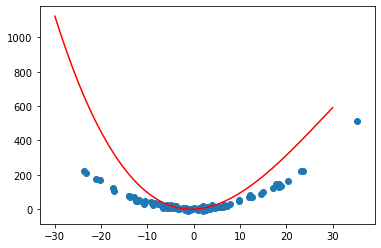

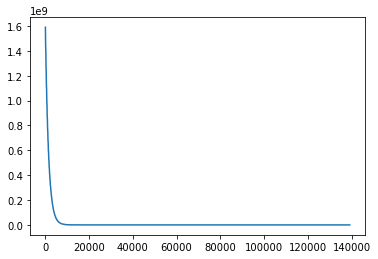

In [47]:
alpha = 10**-11
theta3 = np.array([1, 1, 1, 1])
theta3Old = np.array([10, 10, 10, 10])
err = np.array([])
timeA = 0;
timeArr = np.array([])
ep = 10**-9
start = time.time()
while np.linalg.norm(theta3 - theta3Old) > ep:
    for count, row in enumerate(X_train):
        theta3Old = theta3
        theta3 = theta3 - alpha*(theta3.dot(row) - y_train[count])*row
        if timeA%20 == 0:
            y_calc = theta3[0] + theta3[1]*X_train[:,1] + theta3[2]*X_train[:,2] + theta3[3]*X_train[:, 3]
            error = 0.5*sum(np.power(y_train - y_calc, 2))
            err = np.append(err, error)
            timeArr = np.append(timeArr, timeA)
        timeA = timeA+1
end = time.time()
print(f"Runtime of the program is {end - start}")
xt = np.linspace(-30, 30, 1000)
yt = theta[0] + theta3[1]*np.power(xt, 1) + theta3[2]*np.power(xt, 2) + theta3[3]*np.power(xt, 3)
plot.plot(xt, yt, 'r')
plot.scatter(x_train, y_train)
plot.show()
plot.plot(timeArr, err)
plot.show()

In [48]:
#Calculating training and validation error for cell above
print(err[-1])
y_calc = theta3[0] + theta3[1]*X_val[:,1] + theta3[2]*X_val[:,2]+theta3[3]*X_val[:,3]
error = 0.5*sum(np.power(y_val - y_calc, 2))
print(error)
y_calc = theta3[0] + theta3[1]*X_test[:,1] + theta3[2]*X_test[:,2]+theta3[3]*X_test[:,3]
error = 0.5*sum(np.power(y_test - y_calc, 2))
print(error)

519284.69450900296
80932.88680839646
337808.8459797729


Runtime of the program is 14.541514873504639


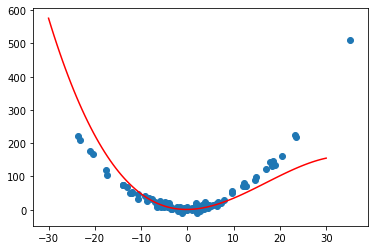

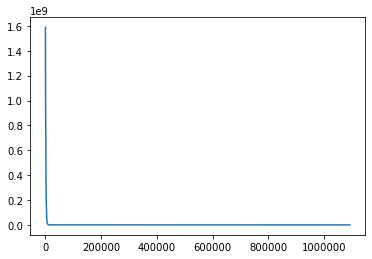

In [45]:
theta3 = np.array([1, 1, 1, 1])
theta3Old = np.array([10, 10, 10, 10])
err = np.array([])
alpha = (10**-11)
e = 10**-9
err = np.array([])
timeA = 0;
timeArr = np.array([])
lmda = 15
lmdaArr = np.array([0, lmda, lmda, lmda])
start = time.time()
while np.linalg.norm(theta3 - theta3Old) > e:
    for i in range(90):
        theta3Old = theta3
        theta3 = theta3 - alpha*(((theta3.dot(X_train[i]) - y_train[i])\
                                  *X_train[i]) + lmdaArr*theta3) 
        if timeA%20 == 0:
                y_calc = theta3[0] + theta3[1]*X_train[:,1] + theta3[2]\
                *X_train[:,2] + theta3[3]*X_train[:, 3]
                error = 0.5*sum(np.power(y_train - y_calc, 2))
                err = np.append(err, error)
                timeArr = np.append(timeArr, timeA)
        timeA = timeA+1
end = time.time()
print(f"Runtime of the program is {end - start}")
xt = np.linspace(-30, 30, 100)
yt = theta[0] + theta[1]*np.power(xt, 1) + theta[2]*np.power(xt, 2)\
+ theta3[3]*np.power(xt, 3)
plot.plot(xt, yt, 'r')
plot.scatter(x_train, y_train)
plot.show()
plot.plot(timeArr, err)
plot.show()

In [46]:
#Calculating training and validation error for cell above
print(err[-1])
y_calc = theta3[0] + theta3[1]*X_val[:,1] + theta3[2]*X_val[:,2]+theta3[3]*X_val[:,3]
error = 0.5*sum(np.power(y_val - y_calc, 2))
print(error)
y_calc = theta3[0] + theta3[1]*X_test[:,1] + theta3[2]*X_test[:,2]+theta3[3]*X_test[:,3]
error = 0.5*sum(np.power(y_test - y_calc, 2))
print(error)

249524.66046083308
39197.547339662655
171284.32941028188


In [35]:
print(theta3)

[ 0.99941861  0.99986465  0.78320615 -0.00794926]
